# To predict Melanoma type of Skin cancer using CNN based model 
- Nanda Kumar M R

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Creating a Data folder to hold all the images

# We expect the zip file containing the images to be present in the root of the drive

file_path = "/content/gdrive/My Drive/Data/"
directory = os.path.dirname(file_path)
print(directory)

if not os.path.exists(directory):
  os.makedirs(directory)
  print('Directory created...')
else :
  print('Directory exists')

/content/gdrive/My Drive/Data
Directory exists


In [4]:
# Extract to the 'Data' folder 
!unzip -uq "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/gdrive/My Drive/Data"

In [5]:
os.rename(file_path + '/Skin cancer ISIC The International Skin Imaging Collaboration', '/content/gdrive/My Drive/Data/Images/')

In [6]:
# Defining the path for train and test images
data_dir_train = pathlib.Path('/content/gdrive/My Drive/Data/Images/Train/')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Data/Images/Test/')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    image_size=(img_height, img_width), 
    validation_split=0.2, 
    subset="training", 
    seed=123,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    image_size=(img_height, img_width), 
    smart_resize=True, 
    validation_split=0.2, 
    subset="validation", 
    seed=123,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

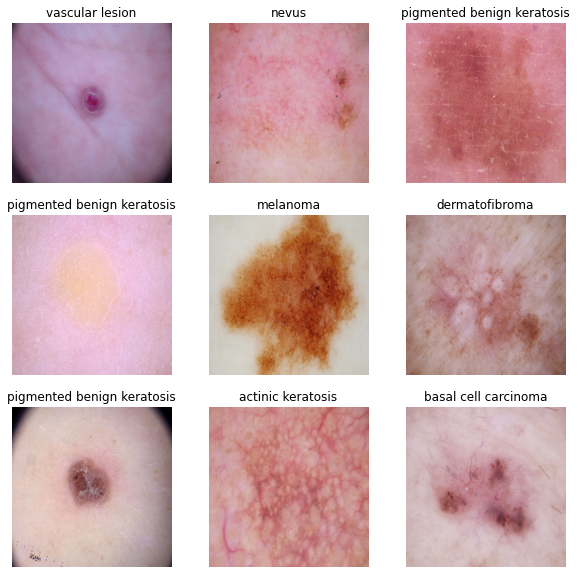

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
# Checking batch shape
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.shape)


(32, 180, 180, 3)
(32,)


In [15]:
# Defining input shape
channels = 3
input_shape = (180, 180, channels)

In [16]:
# Defining number of classes
num_classes = len(class_names)
print(num_classes)

9


In [17]:
model = Sequential()

In [18]:
# Model creation
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  tf.keras.layers.Conv2D(16, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(128, channels, padding='same', activation='relu'),
  #tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)       

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 39s 131ms/step - loss: 2.0037 - accuracy: 0.2266 - val_loss: 1.9934 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 2s 42ms/step - loss: 1.8397 - accuracy: 0.3371 - val_loss: 1.7010 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 2s 42ms/step - loss: 1.6301 - accuracy: 0.4118 - val_loss: 1.6043 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4810 - accuracy: 0.4766 - val_loss: 1.5889 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.3363 - accuracy: 0.5246 - val_loss: 1.3669 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2738 - accuracy: 0.5446 - val_loss: 1.4844 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.1800 - accuracy: 0.5787 - val_loss: 1.5442 - val_accuracy: 0.4765
Epoch 8/20


### Visualizing training results

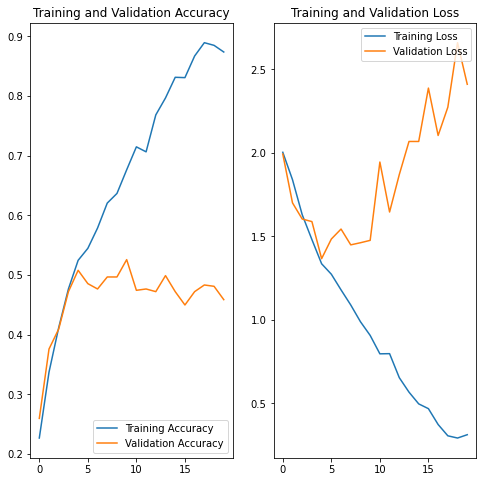

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#Findings after fitting the model:

 **From the above graph we could see that the training accuracy is nearly 90% but the validation accuracy is only** **around 45% - 50%** which shows this **model is overfitting.**
It is advisable that we should adapt an augmentation strategy to overcome the overfitting phenomenon.

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

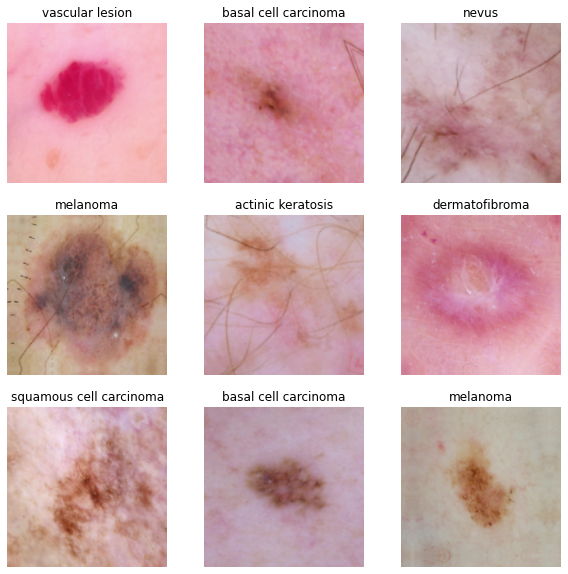

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential()

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  data_augmentation,
  tf.keras.layers.Conv2D(16, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  
  #Trial code
  #tf.keras.layers.Conv2D(128, channels, padding='same', activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)       

### Training the model

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 58ms/step - loss: 2.4878 - accuracy: 0.1987 - val_loss: 2.1028 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 54ms/step - loss: 1.9542 - accuracy: 0.2773 - val_loss: 1.8574 - val_accuracy: 0.3221
Epoch 3/20
56/56 [==============================] - 3s 54ms/step - loss: 1.7876 - accuracy: 0.3532 - val_loss: 1.8531 - val_accuracy: 0.2550
Epoch 4/20
56/56 [==============================] - 3s 56ms/step - loss: 1.6448 - accuracy: 0.4146 - val_loss: 1.6651 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 3s 54ms/step - loss: 1.5424 - accuracy: 0.4576 - val_loss: 1.5425 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 3s 53ms/step - loss: 1.4962 - accuracy: 0.4760 - val_loss: 1.5135 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 3s 54ms/step - loss: 1.4506 - accuracy: 0.4989 - val_loss: 1.5108 - val_accuracy: 0.5101
Epoch 8/20
56

### Visualizing the results

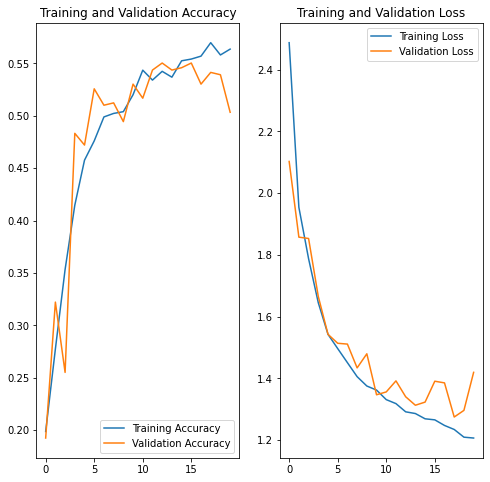

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Yes, there is an improvement in the model accuracy after applying data augmentation. Since the training accuracy is similar to evaluation accuracy the phenomenon of overfitting has been handled significantly.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
path = '/content/gdrive/My Drive/Data/Images/Train/'

dist = [len(os.listdir(path + i)) for i in class_names]

# Printing the samples for each of the classes
for i in range(len(class_names)) :
  print(str(class_names[i]) + ' - ' + str(dist[i]))

actinic keratosis - 114
basal cell carcinoma - 376
dermatofibroma - 95
melanoma - 438
nevus - 357
pigmented benign keratosis - 462
seborrheic keratosis - 77
squamous cell carcinoma - 181
vascular lesion - 139


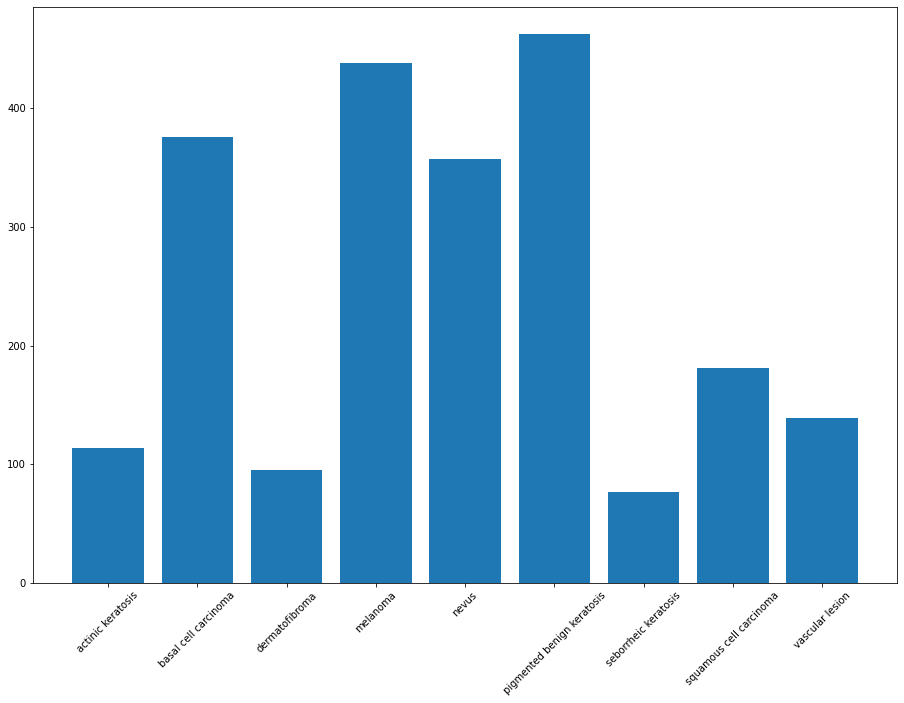

In [31]:
fig = plt.figure(figsize =(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(class_names, dist)
plt.xticks(rotation = 45)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**"Seborrheic keratosis" and "Dermatofibroma" have the least number of samples having 77 and 95 samples respectively.**
#### - Which classes dominate the data in terms proportionate number of samples?
**"Pigmented benign keratosis" and "Melanoma" dominate the data in terms proportionate number of samples.**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset='/content/gdrive/My Drive/Data/Images/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15BCE12F10>: 100%|██████████| 500/500 [00:21<00:00, 23.67 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F15BD0F94D0>: 100%|██████████| 500/500 [00:21<00:00, 22.95 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15BCE125D0>: 100%|██████████| 500/500 [00:21<00:00, 22.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F15BD0F30D0>: 100%|██████████| 500/500 [01:25<00:00,  5.87 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7F15BCD89F50>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F15BCD06850>: 100%|██████████| 500/500 [00:20<00:00, 24.18 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F15BD0E1790>: 100%|██████████| 500/500 [00:48<00:00, 10.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15BCD5B750>: 100%|██████████| 500/500 [00:20<00:00, 24.23 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Images/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F15BCDAE090>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*', '*.jpg'))]

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [38]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
original_df = dict(zip(path_list, lesion_list))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(list(original_df.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [41]:
new_df['Label'].value_counts()

melanoma                      1000
basal cell carcinoma          1000
dermatofibroma                1000
actinic keratosis             1000
nevus                          739
pigmented benign keratosis     500
squamous cell carcinoma        500
vascular lesion                500
seborrheic keratosis           500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
ddata_dir_train="/content/gdrive/My Drive/Data/Images/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
model = Sequential()

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  tf.keras.layers.Conv2D(16, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, channels, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),

  #Trial code
  #tf.keras.layers.Conv2D(128, channels, padding='same', activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#### **Todo:**  Train your model

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 45, 45, 32)       

In [49]:
# Using 30 epochs
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 36s 209ms/step - loss: 0.9272 - accuracy: 0.6699 - val_loss: 0.9946 - val_accuracy: 0.6437
Epoch 2/30
169/169 [==============================] - 36s 207ms/step - loss: 0.7976 - accuracy: 0.7111 - val_loss: 0.8807 - val_accuracy: 0.6986
Epoch 3/30
169/169 [==============================] - 37s 211ms/step - loss: 0.7603 - accuracy: 0.7207 - val_loss: 0.8432 - val_accuracy: 0.6964
Epoch 4/30
169/169 [==============================] - 36s 209ms/step - loss: 0.6488 - accuracy: 0.7622 - val_loss: 0.9052 - val_accuracy: 0.6978
Epoch 5/30
169/169 [==============================] - 36s 209ms/step - loss: 0.5841 - accuracy: 0.7825 - val_loss: 0.7829 - val_accuracy: 0.7342
Epoch 6/30
169/169 [==============================] - 36s 209ms/step - loss: 0.5166 - accuracy: 0.8157 - val_loss: 0.7335 - val_accuracy: 0.7550
Epoch 7/30
169/169 [==============================] - 37s 209ms/step - loss: 0.4460 - accuracy: 0.8377 - val_loss: 0.7117 - val_ac

#### **Todo:**  Visualize the model results

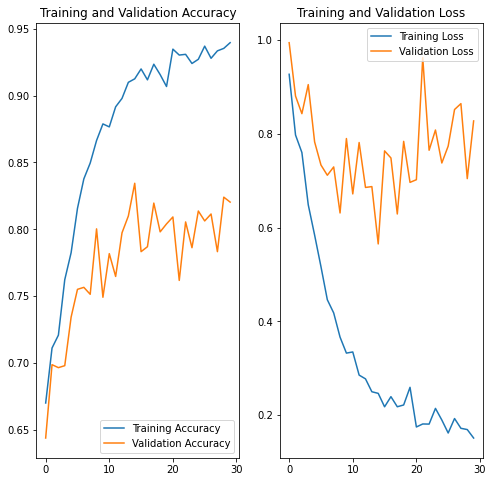

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**Final status of Overfitting:** We can observe the train accuracy and validation accuracy are almost similar, this shows that the overfitting phenomenon has been handled successfully.

**Impact of rebalance:** After training the model on the data created using Augmentor with additional images for class imbalance has improved the model.
